<a href="https://colab.research.google.com/github/ibugueye/eboutik/blob/master/p2v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.listdir("drive/MyDrive/Colab/data")
#os.listdir("/drive/MyDrive/Colab/ocds2023/P2/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['EdStatsCountry-Series.csv',
 'EdStatsData.csv',
 'EdStatsCountry.csv',
 'EdStatsSeries.csv',
 'EdStatsFootNote.csv',
 'projet.ipynb']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stat
import sklearn 
import missingno as msno
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.simplefilter("ignore")

# Lecture des fichiers csv
country = pd.read_csv("/content/drive/MyDrive/Colab/data/EdStatsCountry.csv")
countrySeries =pd.read_csv("/content/drive/MyDrive/Colab/data/EdStatsCountry-Series.csv")
data  = pd.read_csv("/content/drive/MyDrive/Colab/data/EdStatsData.csv")
footnote = pd.read_csv("/content/drive/MyDrive/Colab/data/EdStatsFootNote.csv")
series = pd.read_csv("/content/drive/MyDrive/Colab/data/EdStatsSeries.csv")


In [ ]:
from pandas.core.arrays.timedeltas import precision_from_unit
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",None)





In [ ]:
# recherche des valeurs manquantes 
def check_missing_values(df):
  return df.isna().sum().sum()
# Suppression des valeurs manquantes
def remove_missing_values(df):
  return df.dropna(inplace =True)
# Recherches des valeurs extrèmes 
def check_outliers(df):
  return df.boxplot(figsize=(15,6))
# Histogramme de repartition des variables 
def histogram(df):
  return df.hist(figsize = (15,8))


def heatmap(df):
    plt.figure(figsize=(16,9))
    sns.heatmap(df.corr(), annot=True)
    plt.title("Corrélation Heatmap ")
    plt.show()

In [ ]:
def data_description(df):
    
    print("\n\n")
    
  

    
    nRow,nCol = df.shape
    print("Nombre de lignes :" ,nRow)
    print("Nombre de colonnes :", nCol)
    print("________________________________________________________________")
    
    print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes')
    print("_________________________________________________________________")
    
    
    
    print("Les variables du jeu de données","\n", df.columns)
    
    print("\n\n")
    
    
    
    print("Les informations sur le dataframe", df.info(),"\n")
    
    df.sample()
    
    print("\n\n")
    
    print("-----------------------Recherche des doublons -------------------------------------")
    
    print("Le nombre de doublons obtenus est de :",len(df)- len(df.drop_duplicates()), "doublons","\n\n")
    
    print("\n\n-----------------Visualisation Graphique de la structure des données manquantes -------------")
    
def format_pourcentage(value):
    return "{0: .2f}%".format(value*100)


# supprimer les valeurs manquantes 

def remove_missing_values(df):
    return df.dropna(inplace=True)

# Rechercher les outliers 
def check_outliers(df):
    return df.boxplot(figsize=(15,6))

# Gestion des valeurs manquantes 

#Rechercher les valeurs manquantes 
def missing_values(df):
    return round(df.isna().mean()*100,2)

def pourcentage_de_missing_values(df):
    return df.isna().sum().sum()/df.size

def na_count(col):
    col_null = pd.isnull(col)
    null = col[col_null]
    return len(null)

# Graphes des valeurs manquantes 
def graph_na(df):
    df.apply(na_count).plot(kind="bar", figsize=(16,9))
    plt.title("Valeurs manquantes", fontsize= 12, fontweight="bold")
    plt.xlabel("Les variables du jeux de données",fontweight="bold",fontsize= 14)
    
    plt.ylabel("Le nombre de valeurs manquantes", fontweight="bold",fontsize=12)


def tauxValeursManquantes (df):
  (df.shape[0] - df.apply(na_count))/(df.shape[0])
 
    
def graph_remplissage(df):
    def na_count(column):
        return column.isna().sum()
 
    non_null_count = (df.shape[0] - df.apply(na_count))/(df.shape[0])
    non_null_count.plot(kind="bar", figsize=(16,9))
    plt.title("Les Valeurs manquantes taux de remplissage")
    plt.xlabel("Les variables du jeux de données",fontweight="bold",fontsize= 14)
    
   
    plt.ylabel("Taux de remplissage des valeurs manquantes", fontsize=14, fontweight="bold")
     
def graph_valeurs_manquantes(df):
    fig = plt.figure(figsize=(15,7))

    ax1 = fig.add_subplot(1,2,1)

    graph_na(df)

    ax2 = fig.add_subplot(1,2,2)

    graph_remplissage(df)

    plt.tight_layout()
    
    
    plt.show()
    
        
description = pd.DataFrame(columns= ["Nbre de lignes", "Nbre de colonnes","Taux de remplissage moyen",
                                    "Taux de valeurs manquantes","Doublons","Description"],
                          index =    ["EdStatsCountry-Series.csv",
                                     "EdStatsCountry.csv",
                                     "EdStatsData.csv",
                                      "EdStatsFootNote.csv",
                                      "EdStatsSeries.csv"
                                   
                                  ])
description["Nbre de lignes"] = [
    len(country.index),
    len(data.index),
    len(series.index),
    len(countrySeries.index),
    len(footnote)
]

description["Nbre de colonnes"]=[
    len(country.columns),
    len(data.columns),
    len(series.columns),
    len(countrySeries.columns),
    len(footnote.columns)
    
]


description["Taux de remplissage moyen"] = [
    format_pourcentage(country.notna().mean().mean()),
    format_pourcentage(data.notna().mean().mean()),
    format_pourcentage(series.notna().mean().mean()),
    format_pourcentage(countrySeries.notna().mean().mean()),
    format_pourcentage(footnote.notna().mean().mean()),
    
]

description["Taux de valeurs manquantes"] = [
    format_pourcentage(country.isna().mean().mean()),
    format_pourcentage(data.isna().mean().mean()),
    format_pourcentage(series.isna().mean().mean()),
    format_pourcentage(countrySeries.isna().mean().mean()),
    format_pourcentage(footnote.isna().mean().mean()),


]

description["Doublons"] = [
    country.duplicated(subset=["Country Code"]).sum(),
    series.duplicated(subset=["Indicator Name"]).sum(),
    data.duplicated(subset= ['Country Code',"Indicator Name"]).sum(),
    countrySeries.duplicated(subset=["CountryCode","SeriesCode"]).sum(),
    footnote.duplicated(subset=["CountryCode","SeriesCode","Year"]).sum()
]
description ["Description"]= [
    "Liste des pays avec leurs données principales",
    "Liste des indicateurs avec description, unités , periode, etc...",
    "Données de chaque indicateur par pays et par année",
    "Description des différentes series de données ",
    "Commentaire pour chaque couple de serie de données/pays"
]


# Fonctions Recherche ses Indicateurs 

def recherche_indicateurs(df, colonne_indicateurs):
    # Créer une liste d'indicateurs uniques
    indicateurslist = df[colonne_indicateurs].drop_duplicates().tolist()
    # Compter le nombre de fois où chaque indicateur apparaît dans le DataFrame
    donnees = df[colonne_indicateurs].value_counts()

    # Calculer le taux de remplissage pour chaque indicateur
    resultats = {}
    for indicateur in indicateurslist:
        resultats[indicateur] = donnees[indicateur]

    total_valeurs = sum(resultats.values())
    liste_resultats = [(indicateur, nombre, nombre/total_valeurs*100,nombre/len(df)*100) for indicateur, nombre in resultats.items()]

    # Créer une nouvelle colonne "Taux de remplissage" dans le DataFrame
    df_resultats = pd.DataFrame(liste_resultats, columns=["indicateur", "nombre", "taux_en_pourcentage","taux_de_remplissage"])
    df_resultats["taux_en_pourcentage"] = df_resultats["taux_en_pourcentage"].round(2)
    df_resultats["% remplissage"] = df_resultats["taux_de_remplissage"].round(2)
    
    # Afficher le DataFrame avec les nouvelles colonnes
    return df_resultats[["indicateur","nombre","% remplissage"]].sort_values("% remplissage",ascending=False)

# **2. Exploration et préparation des données**

In [ ]:
description

,Nbre de lignes,Nbre de colonnes,Taux de remplissage moyen,Taux de valeurs manquantes,Doublons,Description
EdStatsCountry-Series.csv,241,32,69.48%,30.52%,0,Liste des pays avec leurs données principales
EdStatsCountry.csv,886930,70,13.90%,86.10%,0,"Liste des indicateurs avec description, unités..."
EdStatsData.csv,3665,21,28.28%,71.72%,0,Données de chaque indicateur par pays et par a...
EdStatsFootNote.csv,613,4,75.00%,25.00%,0,Description des différentes series de données
EdStatsSeries.csv,643638,5,80.00%,20.00%,0,Commentaire pour chaque couple de serie de don...


In [ ]:
annee_de_reference = [str(i) for i in range(2000,2018,1)]


### **2.1 Description des jeux de données EdStatsCountry**

In [ ]:
data_description(country)




Nombre de lignes : 241
Nombre de colonnes : 32
________________________________________________________________
Le jeu de données contient 241 lignes et 32 colonnes
_________________________________________________________________
Les variables du jeu de données 
 Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'La

### **Gestion des valeurs manquantes**


### **Visualisation des valeurs manquantes**
ces graphiques nous permet d'avoir d'un aperçu général des valeurs manquantes et le taux de remplissage 

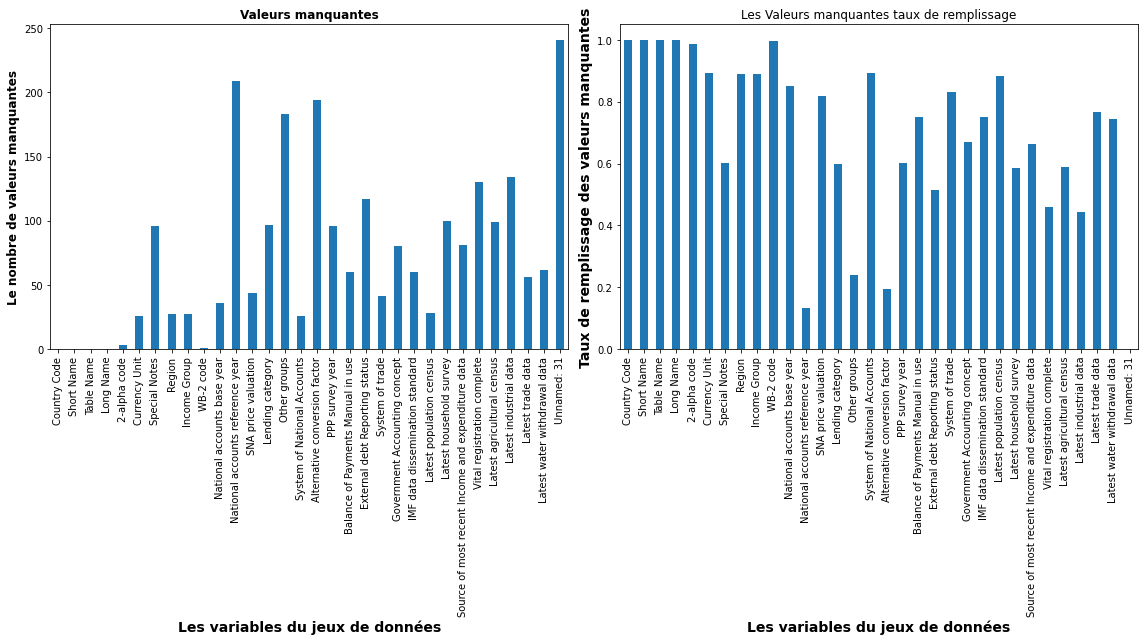

In [ ]:
graph_valeurs_manquantes(country)

In [ ]:
# Les Variables qui constituent le dataset 
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [ ]:
print("La Taille du dataset :", country.size,"\n")
print("les valeurs manquantes :", check_missing_values(country),"\n")
print("le pourcentage de valeurs manquantes: ", round(pourcentage_de_missing_values(country)*100,2),"%")


#msno.bar(country,color="g")

La Taille du dataset : 7712 

les valeurs manquantes : 2354 

le pourcentage de valeurs manquantes:  30.52 %


In [ ]:
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


### **Taux Valeurs Manquantes:**
- nb_var.plot(kind="bar")
- LES VALEURS UNIQUES 
country.nunique() # country.describe(exclude=np.number).iloc[1] 


In [ ]:
# taux de veleur manquante 
(len(country) - country.describe(include="all").iloc[0] ) # round((len(country) - country.nunique())/len(country)*100,2)

Country Code                                             0
Short Name                                               0
Table Name                                               0
Long Name                                                0
2-alpha code                                             3
Currency Unit                                           26
Special Notes                                           96
Region                                                  27
Income Group                                            27
WB-2 code                                                1
National accounts base year                             36
National accounts reference year                     209.0
SNA price valuation                                     44
Lending category                                        97
Other groups                                           183
System of National Accounts                             26
Alternative conversion factor                          1

### **Recherche des Zones Géographiques et Économiques** 

In [ ]:
 country["Region"].unique().tolist()

In [ ]:
nombre_pays_Region = country['Region'].value_counts().sort_values(ascending = True)
nombre_pays_Region 

North America                  3
South Asia                     8
Middle East & North Africa    21
East Asia & Pacific           36
Latin America & Caribbean     41
Sub-Saharan Africa            48
Europe & Central Asia         57
Name: Region, dtype: int64

In [ ]:
# Nombre de pays par Groupe économique
nombre_pays_income_group= country["Income Group"].value_counts().sort_values(ascending=True)
nombre_pays_income_group

High income: OECD       31
Low income              34
High income: nonOECD    44
Lower middle income     50
Upper middle income     55
Name: Income Group, dtype: int64

## **2.2 Description des jeux de données EdStatsCountry-Series.csv**

In [ ]:
data_description(countrySeries)




Nombre de lignes : 613
Nombre de colonnes : 4
________________________________________________________________
Le jeu de données contient 613 lignes et 4 colonnes
_________________________________________________________________
Les variables du jeu de données 
 Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
Les informations sur le dataframe None 




-----------------------Recherche des doublons -------------------------------------
Le nombre de doublons obtenus est de : 0 doublons 




-----------------Visualisation Graphique de la structure 

In [ ]:
print("La Taille du dataset :", countrySeries.size,"\n")
print("les valeurs manquantes :", check_missing_values(countrySeries),"\n")
print("le pourcentage de valeurs manquantes: ", round(pourcentage_de_missing_values(countrySeries)*100,2),"%")

#msno.bar(countrySeries,color="g")
    

La Taille du dataset : 2452 

les valeurs manquantes : 613 

le pourcentage de valeurs manquantes:  25.0 %


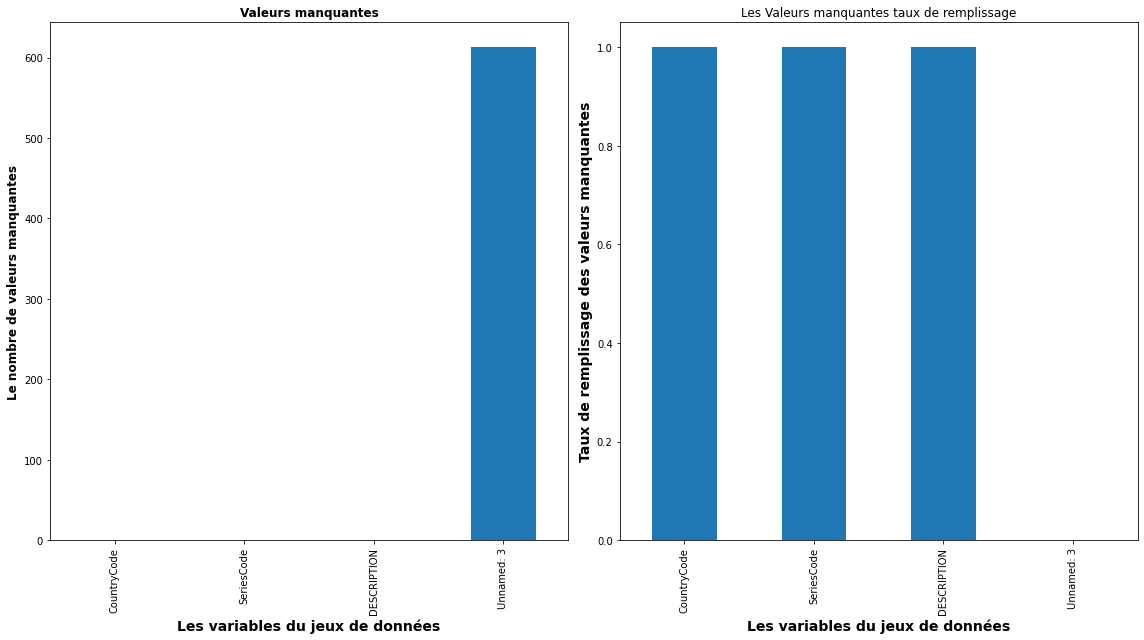

In [ ]:
 graph_valeurs_manquantes(countrySeries)

In [ ]:
countrySeries.describe(exclude=np.number)    

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


- Pas de valeurs manquantes pas de variable numériques ce dataset nous donne des indications sur les indicateur 
- on constate que une représentation conséquente de l'indicateur **SP.POP.TOTL** 

In [ ]:
#@title Default title text
indicateurslist = countrySeries["SeriesCode"].drop_duplicates().tolist()


In [ ]:
donnes = countrySeries["SeriesCode"].value_counts()

In [ ]:
recherche_indicateurs(countrySeries,"SeriesCode")


,indicateur,nombre,% remplissage
0,SP.POP.TOTL,211,34.42
1,SP.POP.GROW,211,34.42
2,NY.GDP.PCAP.PP.CD,19,3.10
6,NY.GDP.PCAP.PP.KD,19,3.10
7,NY.GNP.PCAP.PP.CD,19,3.10
3,NY.GDP.MKTP.PP.KD,14,2.28
4,NY.GNP.MKTP.PP.CD,14,2.28
5,NY.GDP.MKTP.PP.CD,14,2.28
11,SP.POP.0014.TO.ZS,13,2.12
10,SP.POP.TOTL.FE.ZS,13,2.12


In [ ]:
# Recherche du taux de remplissage des Indicateurs demographiques 

indicateurslist = countrySeries["SeriesCode"].drop_duplicates().tolist()
donnees = countrySeries["SeriesCode"].value_counts()

resultats = {}
for indicateur in indicateurslist:
    resultats[indicateur] = donnees[indicateur]

total_valeurs = sum(resultats.values())
liste_resultats = [(indicateur, nombre, nombre/total_valeurs*100,nombre/211*100) for indicateur, nombre in resultats.items()]

# Créer de  nouvelle colonne "Taux de remplissage" dans le dataframe

df_resultats = pd.DataFrame(liste_resultats, columns=["indicateur", "nombre", "taux_en_pourcentage","taux_de_remplissage"])
df_resultats["taux_en_pourcentage"] = df_resultats["taux_en_pourcentage"].round(2)
df_resultats["% remplissage"] = df_resultats["taux_de_remplissage"].round(2)
# Afficher le dataframe avec la nouvelles colonnes
#df_resultats[["indicateur","nombre","% remplissage"]]


**On remarque que 2 indidicateurs peuvent être interessants car ils ont un taux de remplissage de 100% tout le reste ont moins de 10%**
- **SP.POP.TOTL**	  
- **SP.POP.GROW**

(0.0, 250.0)

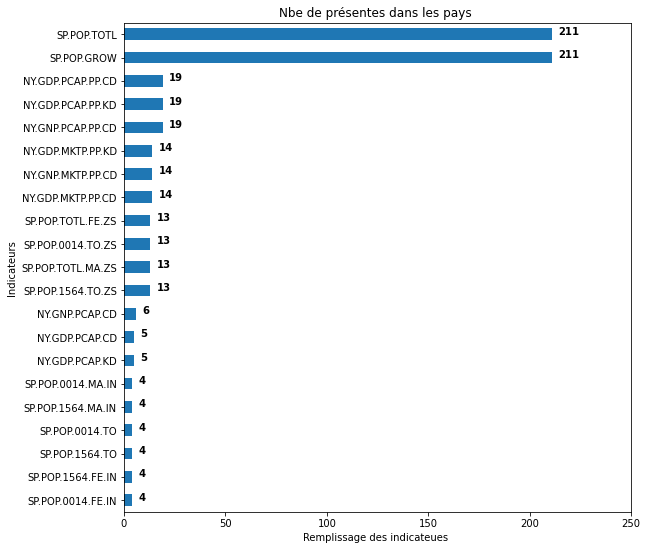

In [ ]:
fig = plt.figure(figsize=(20,9))
indicateurs = countrySeries["SeriesCode"].value_counts().sort_values(ascending = True)

ax1 = fig.add_subplot(1,2,1)
indicateurs.plot(kind="barh")
for i,v in enumerate(indicateurs):
    plt.text(v + 3,i + .01,str(v), fontsize=10, fontweight = "bold")
plt.title("Nbe de présentes dans les pays ")
plt.xlabel("Remplissage des indicateues ")
plt.ylabel("Indicateurs")
plt.tick_params(labelsize= 10)
plt.xlim(0,250)


## **2.3 Description des jeux de données EdStatsFootNote**



In [ ]:
footnote.sample(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643001,ZWE,SE.PRM.ENRL,YR1982,Country Data,NaN
473672,OMN,SE.PRM.PRS5.FE.ZS,YR1999,Estimated,NaN


In [ ]:
data_description(footnote)




Nombre de lignes : 643638
Nombre de colonnes : 5
________________________________________________________________
Le jeu de données contient 643638 lignes et 5 colonnes
_________________________________________________________________
Les variables du jeu de données 
 Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB
Les informations sur le dataframe None 




-----------------------Recherche des doublons -------------------------------------
Le nombre de doublons obtenus est de : 0 do

La Taille du dataset : 3218190 

les valeurs manquantes : 643638 

le pourcentage de valeurs manquantes:  20.0 %


<AxesSubplot:>

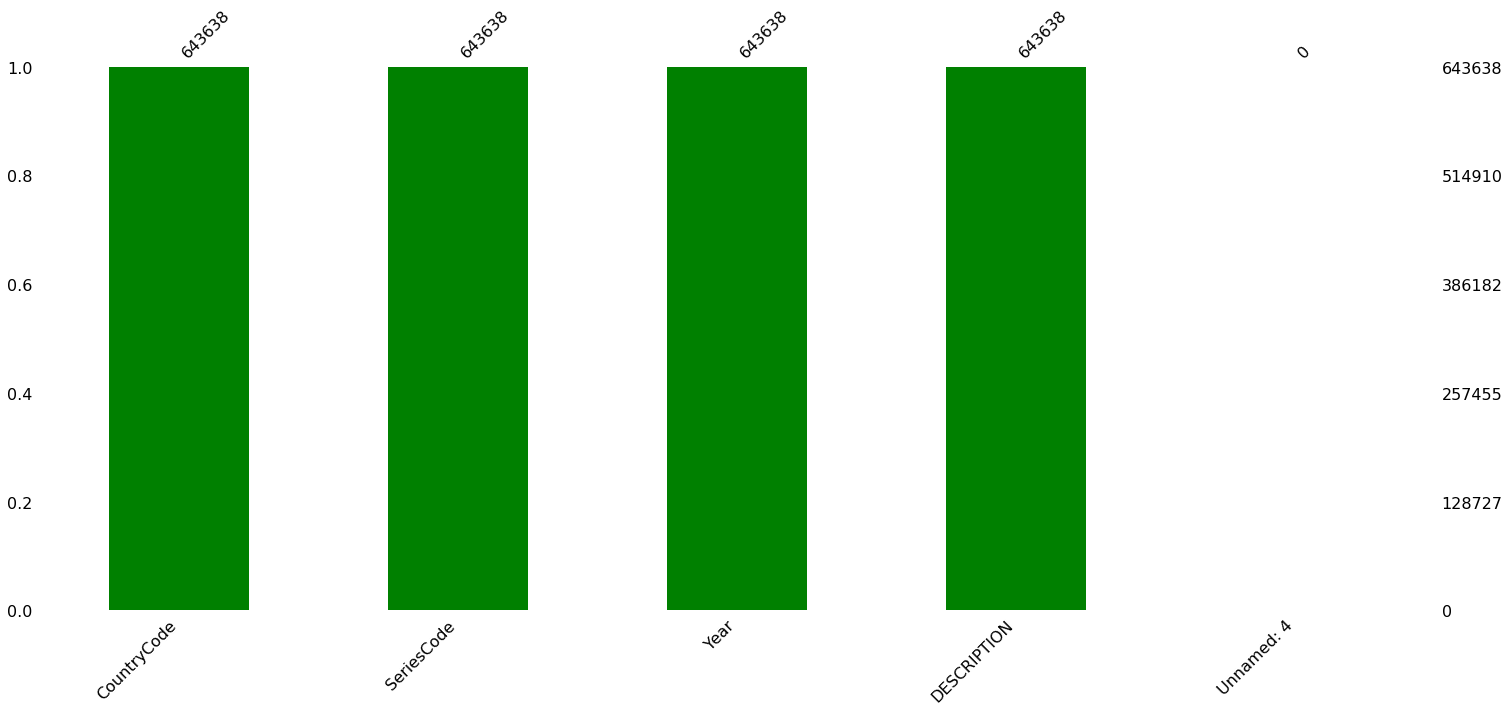

In [ ]:
df= footnote
print("La Taille du dataset :", df.size,"\n")
print("les valeurs manquantes :", check_missing_values(df),"\n")
print("le pourcentage de valeurs manquantes: ", round(pourcentage_de_missing_values(df)*100,2),"%")

msno.bar(df,color="g")
    

In [ ]:
# traitement de la variable Year 
footnote.Year.sort_values().unique()

array(['YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975',
       'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981',
       'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987',
       'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993',
       'YR1994', 'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR1999',
       'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005',
       'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

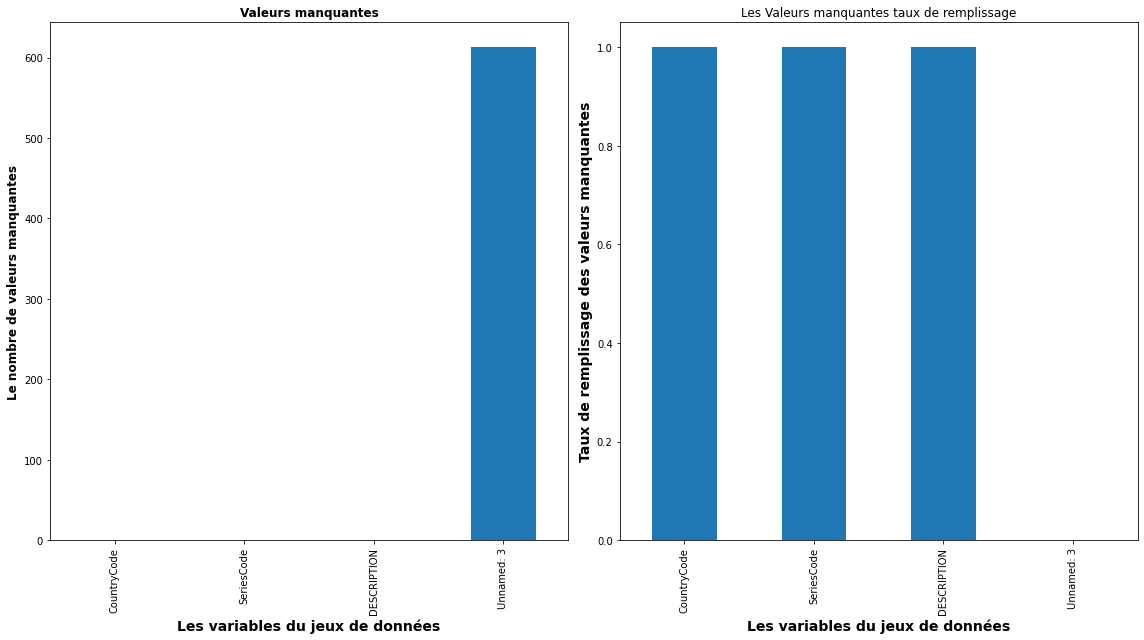

In [ ]:
footnote.Year = [y[2:] for y in footnote["Year"]]
graph_valeurs_manquantes(countrySeries)


In [ ]:
footnote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [ ]:
# Recherche du taux de remplissage des Indicateurs demographiques 

indicateurslist = footnote["SeriesCode"].drop_duplicates().tolist()
donnees = footnote["SeriesCode"].value_counts()

resultats = {}
for indicateur in indicateurslist:
    resultats[indicateur] = donnees[indicateur]

total_valeurs = sum(resultats.values())
liste_resultats = [(indicateur, nombre, nombre/total_valeurs*100,nombre/211*100) for indicateur, nombre in resultats.items()]

# Créer de  nouvelle colonne "Taux de remplissage" dans le dataframe

df_resultats = pd.DataFrame(liste_resultats, columns=["indicateur", "nombre", "taux_en_pourcentage","taux_de_remplissage"])
df_resultats["taux_en_pourcentage"] = df_resultats["taux_en_pourcentage"].round(2)
df_resultats["% remplissage"] = df_resultats["taux_de_remplissage"].round(2)
# Afficher le dataframe avec la nouvelles colonnes
df_resultats[["indicateur","nombre","% remplissage"]]


,indicateur,nombre,% remplissage
0,SE.PRE.ENRL.FE,2903,1375.83
1,SE.TER.TCHR.FE,1773,840.28
2,SE.PRE.TCHR.FE,2491,1180.57
3,SE.SEC.ENRL.GC,2094,992.42
4,SE.PRE.TCHR,2734,1295.73
5,SE.PRE.NENR,1163,551.18
6,SE.SEC.ENRL.VO.FE,1982,939.34
7,SE.PRM.TCHR.FE,3025,1433.65
8,SE.PRE.TCHR.FE.ZS,2424,1148.82
9,SE.PRE.ENRL,3009,1426.07


In [ ]:
import pandas as pd

def recherche_indicateurs(df, colonne_indicateurs):
    # Créer une liste d'indicateurs uniques
    indicateurslist = df[colonne_indicateurs].drop_duplicates().tolist()
    # Compter le nombre de fois où chaque indicateur apparaît dans le DataFrame
    donnees = df[colonne_indicateurs].value_counts()

    # Calculer le taux de remplissage pour chaque indicateur
    resultats = {}
    for indicateur in indicateurslist:
        resultats[indicateur] = donnees[indicateur]

    total_valeurs = sum(resultats.values())
    liste_resultats = [(indicateur, nombre, nombre/total_valeurs*100,nombre/len(df)*100) for indicateur, nombre in resultats.items()]

    # Créer une nouvelle colonne "Taux de remplissage" dans le DataFrame
    df_resultats = pd.DataFrame(liste_resultats, columns=["indicateur", "nombre", "taux_en_pourcentage","taux_de_remplissage"])
    df_resultats["taux_en_pourcentage"] = df_resultats["taux_en_pourcentage"].round(2)
    df_resultats["% remplissage"] = df_resultats["taux_de_remplissage"].round(2)
    
    # Afficher le DataFrame avec les nouvelles colonnes
    return df_resultats[["indicateur","nombre","% remplissage"]]


In [ ]:
Ind_footnote = recherche_indicateurs(footnote,"SeriesCode")


In [ ]:
data.columns

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [ ]:
 
ind_EdStatsdata = recherche_indicateurs(data,"Indicator Code")
ind_EdStatsdata.head(30)

,indicateur,nombre,% remplissage
0,UIS.NERA.2,520,0.04
1,UIS.NERA.2.F,519,0.04
2,UIS.NERA.2.GPI,520,0.04
3,UIS.NERA.2.M,520,0.04
4,SE.PRM.TENR,1466,0.10
5,SE.PRM.TENR.FE,1522,0.10
6,UIS.NERA.1.GPI,1453,0.10
7,SE.PRM.TENR.MA,1524,0.10
8,UIS.NERA.3,476,0.03
9,UIS.NERA.3.F,486,0.03


AttributeError: ignored

In [ ]:
"""# Renommer les colonnes pour simplifier le processus de fusion
series.rename(columns={"Series Code": 'Indicator Code'}, inplace=True)
footnote.rename(columns={"CountryCode": "Country Code"}, inplace=True)
footnote.rename(columns={"SeriesCode": "Indicator Code"}, inplace=True)
countrySeries.rename(columns={"CountryCode": "Country Code"}, inplace=True)


# Fusionner les DataFrames en un seul
data = pd.merge(data, country, on='Country Code', how='left')
data = pd.merge(data, series, on='Indicator Code', how='left')
data = pd.merge(data, footnote, on=['Country Code', 'Indicator Code'], how='left')
data = pd.merge(data, countrySeries, on=['Country Code', 'Indicator Code'], how='left')

data = ['Country Name',"Country Code","Indicator Name","Indicator Code"] +annee_de_reference
"""

'# Renommer les colonnes pour simplifier le processus de fusion\nseries.rename(columns={"Series Code": \'Indicator Code\'}, inplace=True)\nfootnote.rename(columns={"CountryCode": "Country Code"}, inplace=True)\nfootnote.rename(columns={"SeriesCode": "Indicator Code"}, inplace=True)\ncountrySeries.rename(columns={"CountryCode": "Country Code"}, inplace=True)\n\n\n# Fusionner les DataFrames en un seul\ndata = pd.merge(data, country, on=\'Country Code\', how=\'left\')\ndata = pd.merge(data, series, on=\'Indicator Code\', how=\'left\')\ndata = pd.merge(data, footnote, on=[\'Country Code\', \'Indicator Code\'], how=\'left\')\ndata = pd.merge(data, countrySeries, on=[\'Country Code\', \'Indicator Code\'], how=\'left\')\n\ndata = [\'Country Name\',"Country Code","Indicator Name","Indicator Code"] +annee_de_reference\n'